In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from numpy import mean
from numpy import std
from matplotlib import pyplot
import matplotlib
%matplotlib inline
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from scipy.stats import shapiro

# Loading Datasets

In [ ]:
# Whole dataset cleaned
df = pd.read_csv("df_final_cleaned.csv", parse_dates = ['date'])
# Dataframe with US
df_US = pd.read_csv("final_cleaned_us.csv", parse_dates = ['date'])
# Datafrme non US for comparison with US of sentiment score
df_non_US = pd.read_csv("cleaned_NOT_us.csv", parse_dates = ['date'])
# Dataframe vaccination data by day
df_v_d = pd.read_csv("vaccination_cleaned_us.csv", parse_dates = ['Date'])
# Dataframe vaccination data by month
df_v_m = pd.read_csv("vaccination_cleaned_us_month.csv", parse_dates = ['Date'])

,valid_id,date_day,date_week,date_month,city,state,state_code,country,followers,retweets,replies,likes,quotes,score
date,,,,,,,,,,,,,,
2020-04-14 05:52:44+00:00,1249938618497597441,2020-04-14,2020-15,2020-04,Corona,California,CA,Riverside County,164,0,0,1,0,0.136364
2020-04-14 06:24:30+00:00,1249946616603131905,2020-04-14,2020-15,2020-04,Crofton,Maryland,MD,Anne Arundel County,6159,0,0,0,0,-0.172917
2020-04-14 07:11:51+00:00,1249958530800549888,2020-04-14,2020-15,2020-04,Gulfport,Mississippi,MS,Harrison County,2126,0,0,0,0,0.198148
2020-04-14 07:12:47+00:00,1249958765056503809,2020-04-14,2020-15,2020-04,Cleveland,Ohio,OH,Cuyahoga County,848,0,0,0,0,0.000000
2020-04-14 09:34:30+00:00,1249994429194272768,2020-04-14,2020-15,2020-04,Coffeyville,Kansas,KS,Montgomery County,493,0,1,0,0,-0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-21 23:50:41+00:00,1462569185750306816,2021-11-21,2021-47,2021-11,Gardnertown,New York,NY,Orange County,175,0,0,0,0,0.600000
2021-11-21 23:55:18+00:00,1462570347790802951,2021-11-21,2021-47,2021-11,Corvallis,Oregon,OR,Benton County,268,0,0,0,0,0.400000
2021-11-22 01:21:22+00:00,1462592006216159234,2021-11-22,2021-47,2021-11,Ashland,Virginia,VA,Hanover County,626,0,0,0,0,0.000000


In [ ]:
df_US.set_index('date', inplace = True)
df.set_index('date', inplace = True)
df_non_US.set_index('date', inplace = True)

In [73]:
df_v_d

,Date,MMWR_week,Location,Distributed,Dist_Per_100K,Administered,Admin_Per_100K,Admin_Per_100k_12Plus,Admin_Per_100k_18Plus,Admin_Per_100k_65Plus
0,2021-12-08,49,KS,4876755,167395,3801000,130470,152787,158458,231245
1,2021-12-08,49,MT,1676425,156854,1361061,127347,146438,151849,220329
2,2021-12-08,49,UT,5129730,160006,4219274,131607,159768,166031,237816
3,2021-12-08,49,MN,10281050,182300,8550716,151618,174777,180508,254476
4,2021-12-08,49,MA,13707690,198878,11996820,174056,194859,198381,248544
...,...,...,...,...,...,...,...,...,...,...
17995,2020-12-14,51,WV,10725,598,29,2,0,0,0
17996,2020-12-14,51,IL,47775,377,0,0,0,0,0
17997,2020-12-14,51,ME,1950,145,0,0,0,0,0
17998,2020-12-14,51,CA,33150,84,0,0,0,0,0


# Check Normality of Sentiment score

In [80]:
print('For the US dataset, the sentiment score has:\nMean score = %.3f \nStdv score = %.3f' % (mean(df_US['score']), std(df_US['score'])))

For the US dataset, the sentiment score has:
Mean score = 0.134 
Stdv score = 0.260


In [ ]:
# histogram plot
pyplot.hist(df_US['score'])
pyplot.show()

In [ ]:
# q-q plot
qqplot(df_US['score'], line='s')
pyplot.show()

In [ ]:
# normality test
stat, p = shapiro(df_US['score'])
print('Statistics = %.3f, p = %.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

# mmmmmmmmmmmmmmmmmmmmmm doesn't look right

# Some information about the dataset

In [9]:
# Mean sentiment score 
# OR US VS REST OF THE WORLD?
print('Original dataset:')
print('Mean sentiment score:', str(round(df['score'].mean(), 5))) 
print('Standard deviation sentiment score:', str(round(df['score'].std(), 5))) 
print('\n')
print('US dataset:')
print('Mean sentiment score:', str(round(df_US['score'].mean(), 5))) 
print('Standard deviation sentiment score:', str(round(df_US['score'].std(), 5))) 

Original dataset:
Mean sentiment score: 0.12996
Standard deviation sentiment score: 0.25303


US dataset:
Mean sentiment score: 0.13423
Standard deviation sentiment score: 0.26042


In [10]:
# again, should I just do it vs the rest of the world? df_NON_us
print('Original dataset:')
print(df[df['score'] < 0].shape, 'tweets with sentiment score < 0')
print(df[df['score'] > 0].shape, 'tweets with sentiment score > 0')
print(df[df['score'] == 0].shape, 'tweets with sentiment score = 0')
print('\n')
print('US dataset:')
print(df_US[df_US['score'] < 0].shape, 'tweets with sentiment score < 0')
print(df_US[df_US['score'] > 0].shape, 'tweets with sentiment score > 0')
print(df_US[df_US['score'] == 0].shape, 'tweets with sentiment score = 0')

Original dataset:
(58020, 13) tweets with sentiment score < 0
(206709, 13) tweets with sentiment score > 0
(121860, 13) tweets with sentiment score = 0


US dataset:
(25366, 14) tweets with sentiment score < 0
(88965, 14) tweets with sentiment score > 0
(49531, 14) tweets with sentiment score = 0


In [ ]:
# Some date info
# I guess we have to keep only 2021 data for the vaccination data
print('Most recent date:', df_US['date'].max())
print('Less recent date:', df_US['date'].min())
print('Time span of the dataset:', df_US['date'].max() - df_US['date'].min())

# Plots

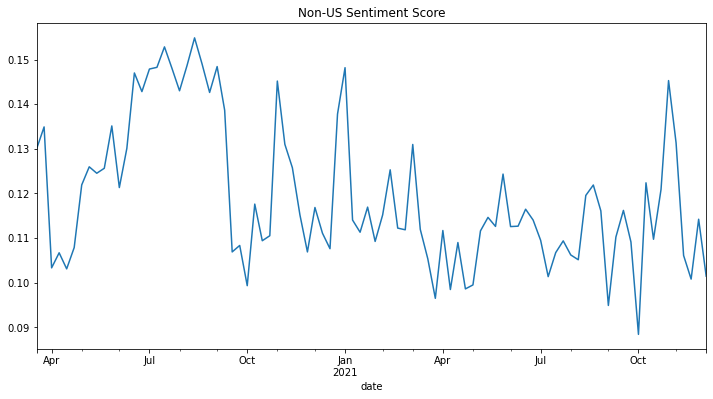

In [12]:
# Global mean sentiment by week
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Non-US Sentiment Score')
# ax.set_ylim([-1, 1]) # add this line to see how it is when y ax from -1 to 1
df_non_US['score'].resample('W').mean().plot() # change 'W' to 'M' to see monthly chenges

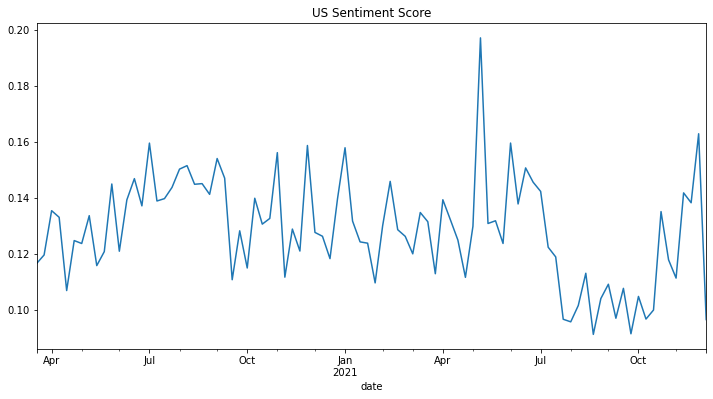

In [13]:
# US mean sentiment by week
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('US Sentiment Score')
# ax.set_ylim([-1, 1]) # add this line to see how it is when y ax from -1 to 1
df_US['score'].resample('W').mean().plot() # change 'W' to 'M' to see monthly chenges

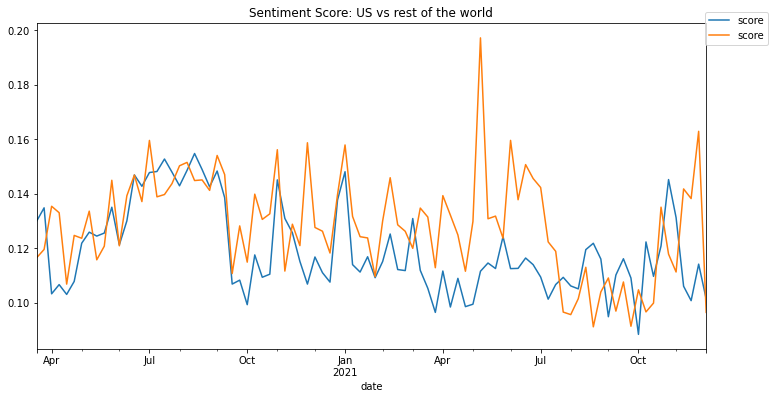

In [43]:
fig, ax = plt.subplots(figsize=(12, 6))

y = df_non_US['score'].resample('W').mean().plot()
z = df_US['score'].resample('W').mean().plot()

ax.set_title('Sentiment Score: US vs rest of the world')

# ax.set_ylim([-1, 1]) # add this line to see how it is when y ax from -1 to 1
# HOW TO CHANGE LABELS???
plt.legend(bbox_to_anchor=(1.1, 1.05))

plt.show()

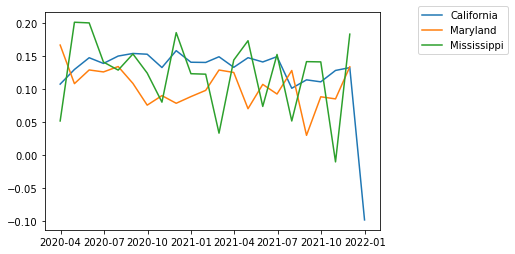

In [59]:
# Liberal vs conservative, need to find a list of liberal/conservative states and group by them
# map of us with vaccination rate and vaccination rate
# I GUESS I WILL DO EVERY STATE ITS SCORE AND VACCINATION RATE

d = df_US
d['score'].resample('W').mean()

g = df_US['state'].unique()

# counter = 0
for i in range(len(g) - 47):
    try:
        f = g[i]
        plt.plot(d[d['state'] == f].resample('M').mean()['score'], label=f)
    except:
        break

# for x in d['state'].unique():
#     plt.plot(d[d['state'] == x].resample('W').mean()['score'], label=x)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [93]:
conservative = ['MT', 'ID', 'WY', 'UT', 'ND', 'SD', 'NE', 'KS', 'OK', 'TX', 'AK', 'IA', 'MO', 'AR', 'LA', 'MS', 'AL', 'FL', 'SC', 'TN', 'NC', 'KY', 'IN', 'OH', 'WV']
liberal = ['WA', 'OR', 'CA', 'NV', 'AZ', 'NM', 'CO', 'HI', 'MN', 'WI', 'IL', 'MI', 'ME', 'NH', 'VT', 'MA', 'NY', 'PA', 'RI', 'CT', 'NJ', 'DE', 'MD', 'GA', 'VA']

states = [ 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
           'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']

print('Total of', len(states), 'states in the US')

# Check if missing states
summed = conservative + liberal
for i in states:
    if i not in summed:
        print(i)

Total of 50 states in the US


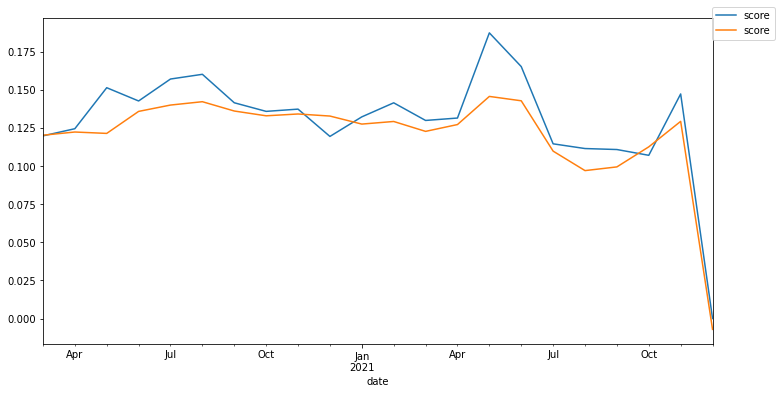

In [104]:
# Plot
fig, ax = plt.subplots(figsize=(12, 6))
# ax.set_ylim([-1, 1]) # add this line to see how it is when y ax from -1 to 1
y = df_con['score'].resample('M').mean().plot()
z = df_lib['score'].resample('M').mean().plot()
plt.legend(bbox_to_anchor=(1.1, 1.05)) # H0W THE FUCK DO I SET THE LABLES MYSELF

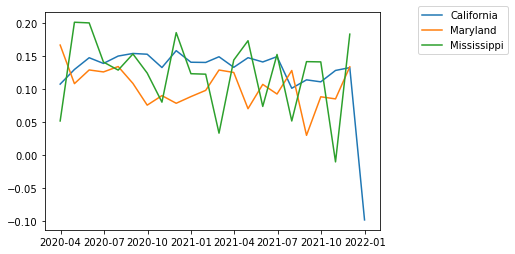

In [59]:
# Liberal vs conservative, need to find a list of liberal/conservative states and group by them
# map of us with vaccination rate and vaccination rate
# I GUESS I WILL DO EVERY STATE ITS SCORE AND VACCINATION RATE

# Create 2 instances with Liberal and Conservative states 
df_con = df_US[df_US.state_code.isin(conservative)]
df_lib = df_US[df_US.state_code.isin(liberal)]

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
y = df_con['score'].resample('W').mean().plot()
z = df_lib['score'].resample('W').mean().plot()


d = df_US
d['score'].resample('W').mean()

g = df_US['state'].unique()

# counter = 0
for i in range(len(g) - 47):
    try:
        f = g[i]
        plt.plot(d[d['state'] == f].resample('M').mean()['score'], label=f)
    except:
        break

# for x in d['state'].unique():
#     plt.plot(d[d['state'] == x].resample('W').mean()['score'], label=x)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

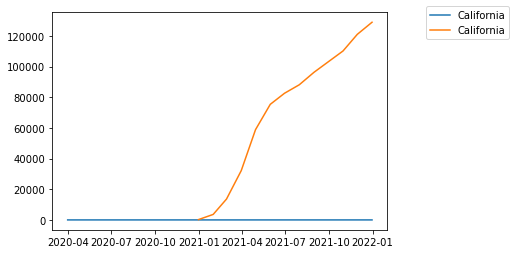

In [78]:
# Plotting the vaccination rate (maybe change it to another measure rather than cumulative %) 
# togheter with the sentiment score for each country. 
# After run correlations I guess
plt.subplots()

n = df_v_d['Location'].unique()

# HOW TO SET DIFFERENT SCALES
for i in range(len(g) - 49):
    try:
        f = g[i]
        h = n[i]
        plt.plot(d[d['state'] == f].resample('M').mean()['score'], label=f)
        plt.plot(e[e['Location'] == h].resample('M').mean()['Admin_Per_100K'], label=f)
    except:
        break

# for x in d['state'].unique():
#     plt.plot(d[d['state'] == x].resample('W').mean()['score'], label=x)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()